# Harjeet Singh Yadav
## CSAI 2024, 2020561

# Importing Important libararies

In [ ]:
from matplotlib import pyplot
import numpy as np
from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
x_train.shape   # 60 thousand training samples


(60000, 28, 28)

In [ ]:
x_test.shape    # 10 thousand testing samples


(10000, 28, 28)

In [ ]:
y_train.shape


(60000,)

In [ ]:
y_test.shape


(10000,)

In [ ]:
y_train[:10]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# Data visualisation 

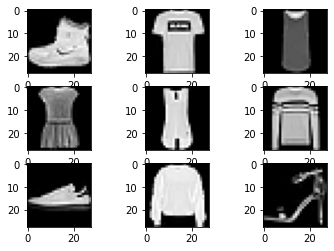

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
class_name = ["T-shirt" ,"Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt" , "Sneaker" , "Bag" , "Ankle Boot"]


# Building Feed Forward Neural Network

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
feed_forward = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128, activation = "relu"),
                             tf.keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
feed_forward.compile( optimizer= tf.keras.optimizers.SGD(learning_rate=0.1),
                      loss = "categorical_crossentropy",
                      metrics = ["accuracy"]
                     )


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

## training the model

In [ ]:
history = feed_forward.fit(x_train, y_train,validation_data=(x_test, y_test), epochs = 25, batch_size = 40, verbose = 0)

In [ ]:
feed_forward.predict(x_test)[0]

array([2.9349496e-07, 2.8860627e-09, 3.0479310e-08, 6.3576699e-08,
       3.9827072e-10, 7.9242018e-06, 7.3033788e-09, 1.3490370e-03,
       3.7295536e-07, 9.9864227e-01], dtype=float32)

In [ ]:
# evaluate the model
train_acc = feed_forward.evaluate(x_train, y_train, verbose=0)
test_acc = feed_forward.evaluate(x_test, y_test, verbose=0)

In [ ]:
print("Loss during training : ", train_acc[0])
print("Accuray of training : ", train_acc[1])

Loss during training :  0.16156701743602753
Accuray of training :  0.9401000142097473


In [ ]:
print("Loss during testing : ", test_acc[0])
print("Accuray of testing : ", test_acc[1])

Loss during testing :  0.3392362892627716
Accuray of testing :  0.8889999985694885


# Ploting the loss

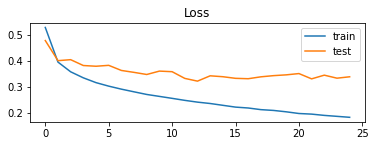

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# Ploting the accuracy epoch wise

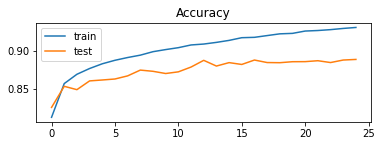

In [ ]:
# plot accuracy during testing
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


# Cunfusion matrix
# Classwise accuracy

In [ ]:
y_pred = feed_forward.predict(x_test)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([2.9349496e-07, 2.8860627e-09, 3.0479310e-08, 6.3576699e-08,
       3.9827072e-10, 7.9242018e-06, 7.3033788e-09, 1.3490370e-03,
       3.7295536e-07, 9.9864227e-01], dtype=float32)

In [ ]:
y_label =[]
for i in range(len(y_pred)):
  max_index_col = np.argmax(y_pred[i], axis=0)  
  y_label.append(max_index_col)
  
y_label = np.array(y_label)

In [ ]:
y_label.shape

(10000,)

In [ ]:
y_test_label = []
for i in range(len(y_test)):
  max_index_col = np.argmax(y_test[i], axis=0)  
  y_test_label.append(max_index_col)
  
y_test_label = np.array(y_test_label)

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':10})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    pyplot.title(title)
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

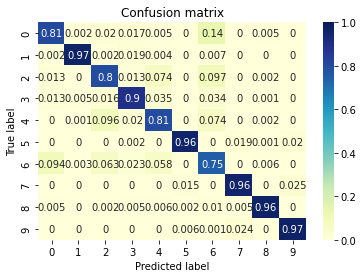

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
cm3 = confusion_matrix(y_test_label, y_label)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm3, classes = [0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')